**<center><font color='red' size=48:>**Netflix TV Shows & Movies</font></center>
<br>

# Introduction

The Netflix TV Shows and Movies dataset provides comprehensive information
about various titles available on the popular streaming platform. The dataset includes details such as the title's name, its type (whether it is a TV show or a movie), a brief description of the content, the year it was released, age certification rating, runtime (for TV shows: length of episodes; for movies: duration), IMDb score, and IMDb votes.

By analyzing this dataset, we can gain insights into the distribution of IMDb scores and ratings for both TV shows and movies available on Netflix. This information can help us understand the popularity and reception of titles based on user ratings.

# Loading and exploratory analysis of the data

 1- In this step we import the necessary libraries.

 2- Mounte our Google Drive.

 3- Create copies of our database to facilitate manipulation without altering the original.

In [14]:
# Load necessary libraries
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets

In [16]:
# Load the dataset and display its shape
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Final Project /Netflix TV Shows and Movies.csv')
data_1 = data.copy()
print(data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(5283, 11)


# 1. Data Understanding

In [17]:
# Display the first 5 rows of the dataset
data.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [18]:
# Display the last 5 rows of the dataset
data.tail(5)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0
5282,5282,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,tt13711094,8.8,16.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [20]:
#Display the names of all the columns
data.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [21]:
# Explore the distribution of numeric columns
data.describe()


,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


We can check the minimum and maximum values ​​of each numerical attribute. It is soon possible to notice that the oldest title is from 1953 and the newest from 2022, however the highest concentration of releases is in 2018. We can also notice that we do not have any title with a maximum score of 10, with the highest score being 9.6 and the lowest of 1.5, but with an average of 6.5.

We can also see the last 10 titles.

# 2. Data Cleaning :

First, we're going to drop columns that we dont need for analyzing e.g: index, id, and imdb_id



In [22]:
data.drop(columns=['index', 'id','imdb_id'], inplace=True)
data

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0
...,...,...,...,...,...,...,...,...
5278,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,5.8,26.0
5279,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,6.9,39.0
5280,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,6.5,32.0
5281,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,6.2,9.0


In [23]:
data_1.isna().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

Based on my consideration, we're going to impute the missing values on age_certification with the value "Unknown". Because, if we impute it without consideration, it can mess with the analysis result. And if we decide to drop the column, the column itself is too important for the analysis, and if we decide to drop the nan values, it would very influential to the dataset because the missing value is 2285. It's almost half the dataset.

So for now, we're going to label it to "Unknown". We assume the Unknown values as not yet age certified

In [24]:
data['age_certification'].fillna('Unknown', inplace=True)


After that, we're going drop movies with imdb_votes == NaN, because it only contain 16 titles. It's not going to be very influential to our analysis because it's not even 1% of the dataset.

In [25]:
data.dropna(subset=['imdb_votes'], inplace=True)
data.isna().sum()

title                0
type                 0
description          4
release_year         0
age_certification    0
runtime              0
imdb_score           0
imdb_votes           0
dtype: int64

After the missing value is handled, let's move to checking duplicate values on the dataset

In [26]:
data.duplicated().sum()


0

# 3. Exploratory Data Analysis (EDA)

In [27]:
# Count occurrences of each country or region
data['release_year'].value_counts()

release_year
2019    746
2018    733
2021    682
2020    654
2017    554
       ... 
1974      1
1959      1
1962      1
1978      1
1985      1
Name: count, Length: 66, dtype: int64

In [28]:
# Group by year and type, and count the number of records in each group
count_by_type_and_year = data.groupby(['release_year', 'type']).size().reset_index(name='count')

# Print the result
count_by_type_and_year

,release_year,type,count
0,1953,MOVIE,1
1,1954,MOVIE,2
2,1956,MOVIE,1
3,1958,MOVIE,1
4,1959,MOVIE,1
...,...,...,...
101,2020,SHOW,250
102,2021,MOVIE,406
103,2021,SHOW,276
104,2022,MOVIE,88


## *1. Exploring the distribution of TV shows and movies*

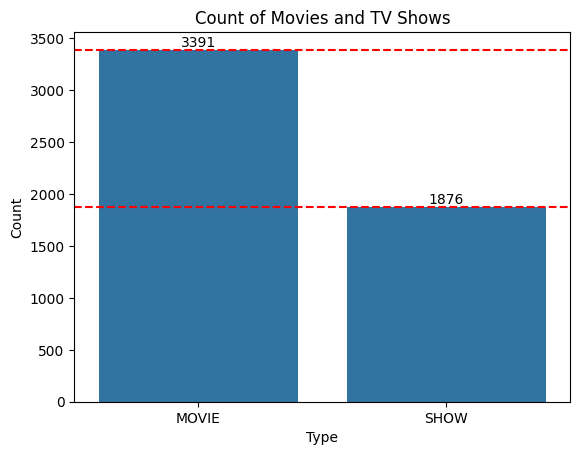

In [29]:
## Distribution of Movies and TV Shows

sns.countplot(data, x='type')
# Find the maximum count for each type
max_counts = data['type'].value_counts()

# Add axhline for each type
for i, count in enumerate(max_counts):
    plt.axhline(y=count, color= 'red', linestyle='--', label=f'Max Count for {max_counts.index[i]}')

# Annotate count values on top of each bar
for i, count in enumerate(data['type'].value_counts()):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
    # Set labels and title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows')

# Show the plot
plt.show()

There's a significant difference between the proportion of movies and shows on netflix.

## *2. Distribution Analysis*

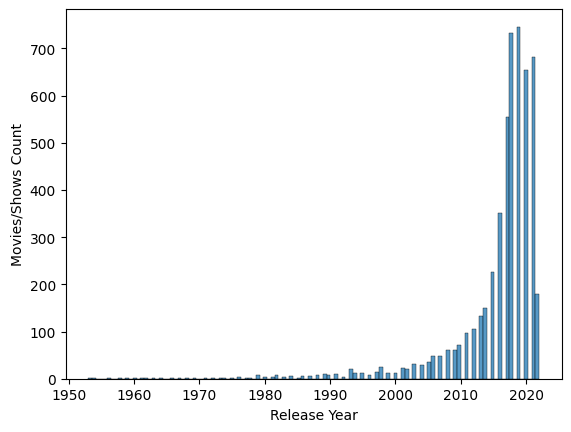

In [30]:
## Distribution of release_year (to understand how the content is spread over time)
sns.histplot(data, x='release_year')
plt.xlabel('Release Year')
plt.ylabel('Movies/Shows Count')
plt.show()

The surge in movie and show releases, from one per year to as many as 180 now, points to a booming entertainment industry. This growth reflects how technology has evolved, making it easier for filmmakers and producers to create content since 1953.

<Axes: xlabel='imdb_score', ylabel='Count'>

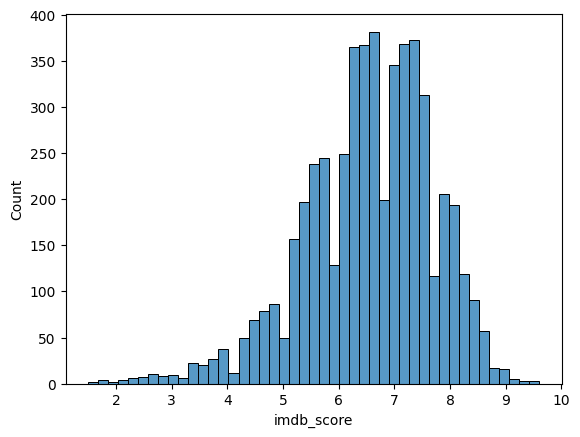

In [31]:
## Distribution of IMDb Scores for Movies and TV Shows
sns.histplot(data, x='imdb_score')

In [45]:
print('Median:', data['imdb_score'].median())
print('Mean: ',data['imdb_score'].mean())

Median: 6.6
Mean:  6.533263717486235


Looking at the chart, it becomes evident that IMDb tends to assign a score of 6.6 most frequently to films, and the average rating stands at 6.5. This suggests a common trend in IMDb ratings for movies.

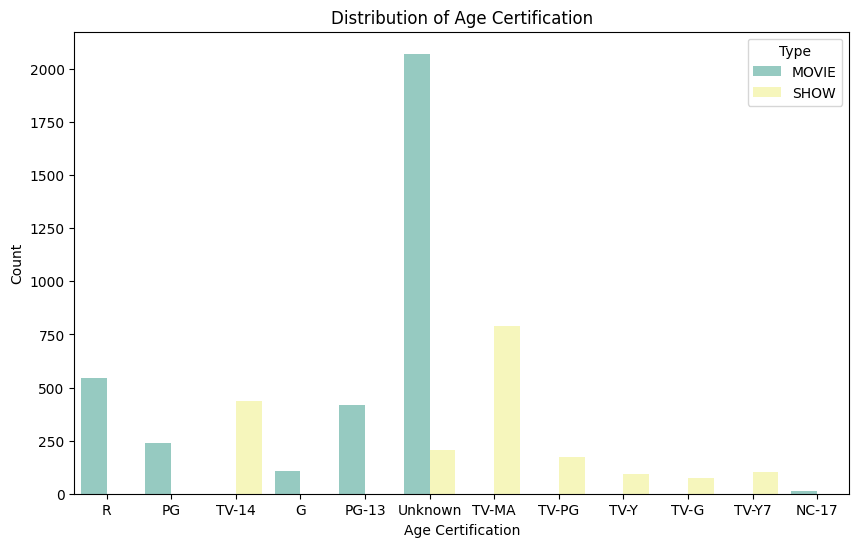

In [33]:
## Distribution of Age Certification

plt.figure(figsize=(10, 6))
sns.countplot(data, x='age_certification', hue='type', palette='Set3')
plt.title('Distribution of Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()


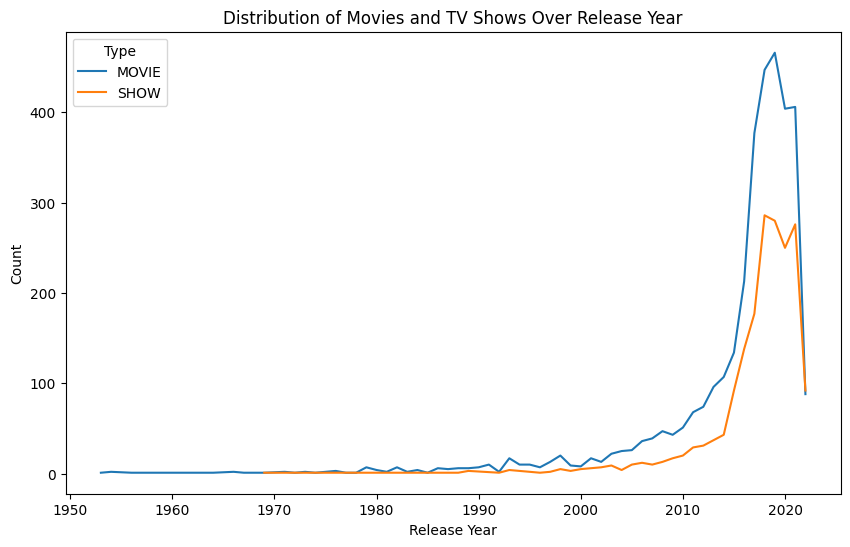

In [34]:
## Distribution of Movies and TV Shows Over Release Year
plt.figure(figsize=(10, 6))
sns.lineplot(count_by_type_and_year, x='release_year', y='count', hue='type')
plt.title('Distribution of Movies and TV Shows Over Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()


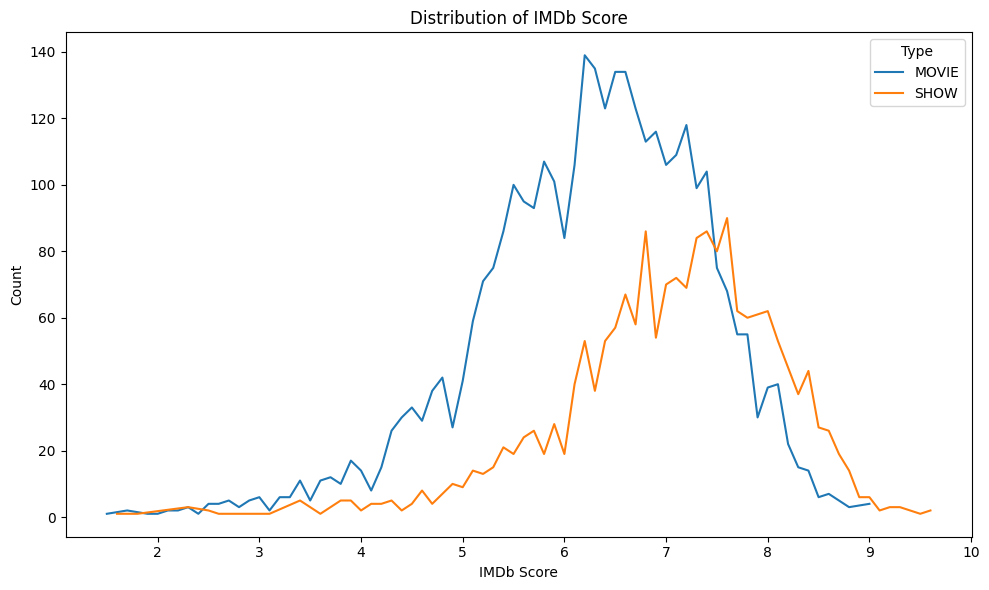

In [35]:
# Distribution of IMDb Score

# Group by imdb_score and type, and count the number of records in each group
count_by_score_and_type = data.groupby(['imdb_score', 'type']).size().reset_index(name='Count')

# Plot the distribution of IMDb scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=count_by_score_and_type, x='imdb_score', y='Count', hue='type')
plt.title('Distribution of IMDb Score')
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


## *3. Correlation Analysis between IMDb scores and votes *
Examine the correlation between IMDb scores and votes to understand if highly-rated content also tends to receive more votes.



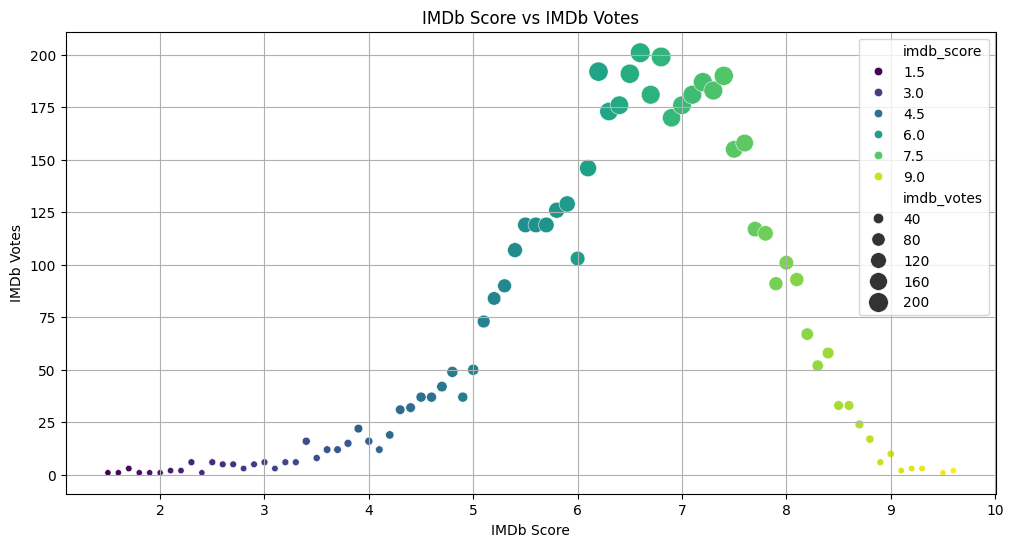

In [36]:
plt.figure(figsize=(12, 6))
score_counts = data.groupby('imdb_score')['imdb_votes'].count().reset_index()

sns.scatterplot(data=score_counts, x='imdb_score', y='imdb_votes', hue='imdb_score', palette='viridis', size='imdb_votes', sizes=(20, 200))
plt.title('IMDb Score vs IMDb Votes')
plt.xlabel('IMDb Score')
plt.ylabel('IMDb Votes')
plt.grid()
plt.show()




The x-axis of the plot shows the IMDb score, which is a weighted average of user ratings on IMDb. The y-axis shows the IMDb votes, which is the total number of user ratings that a movie or show has received.

The visualization shows a positive correlation between IMDb score and IMDb votes. This means that movies and shows with higher IMDb scores tend to have more IMDb votes. This is likely because people are more likely to vote for movies and shows that they enjoyed.

The visualization also shows that there is a lot of variation in the data. There are some movies and shows with high IMDb scores but relatively few IMDb votes, and vice versa. This is likely due to a number of factors, such as the genre of the movie or show, the marketing budget, and the release date.

Overall, the visualization provides a useful overview of the relationship between IMDb score and IMDb votes. It shows that there is a positive correlation between the two variables, but that there is also a lot of variation in the data.

## *4. Over the years Analysis*

Exploring how the number of TV shows and movies has changed over the years (using release_year)


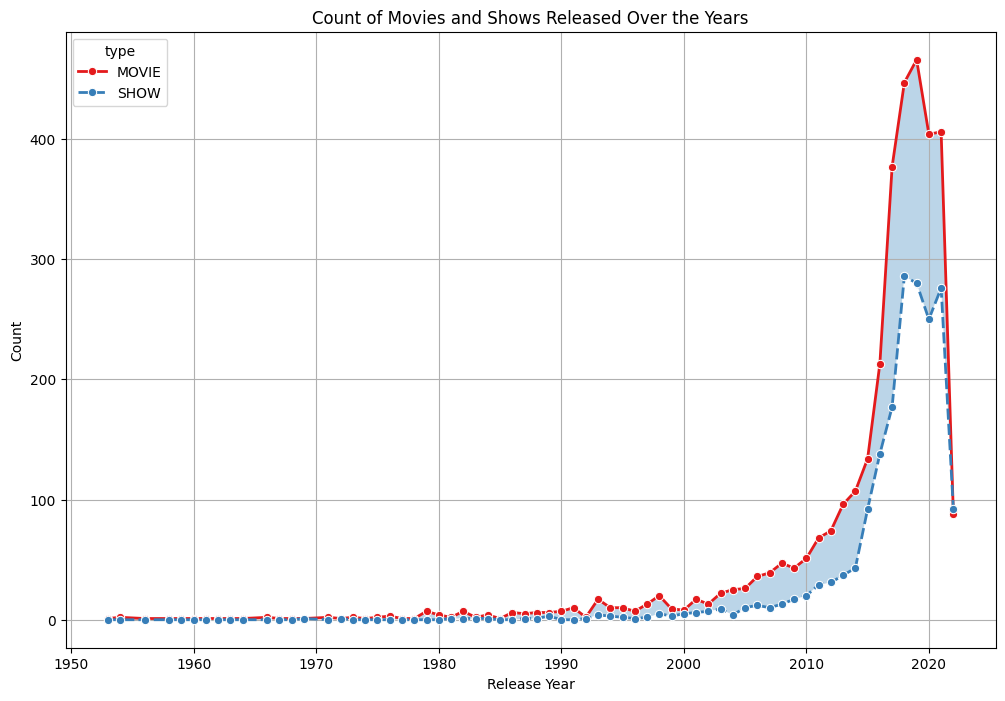

In [37]:
ct = pd.crosstab(index=data['release_year'], columns=data['type'])
plt.figure(figsize=(12, 8))
sns.lineplot(data=ct, marker='o', palette='Set1', linewidth=2)
plt.fill_between(ct.index, ct['MOVIE'], ct['SHOW'], alpha=0.3)
plt.title('Count of Movies and Shows Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid()
plt.show()


The visualization illustrates the release count of movies and shows from the 1950s to 2023, presented in a line chart with movies represented in red and shows in blue. Over this period, both movies and shows have seen a consistent increase in releases. While initially starting with just a few releases in the 1950s, by 2020, the number surged to over 400 for both movies and shows. However, movies have consistently outnumbered shows, with the gap widening in recent years, reaching about 200 more movies released than shows. This indicates a significant growth in the entertainment industry over the past 70 years, with movies dominating the release count throughout the entire period.

# *5.Age certification Analysis*
Checking if there are age certifications that are more common than others to understand the target audience for the content

In [38]:
data['age_certification']

0             R
1            PG
2             R
3             R
4         TV-14
         ...   
5278    Unknown
5279    Unknown
5280    Unknown
5281    Unknown
5282    Unknown
Name: age_certification, Length: 5267, dtype: object

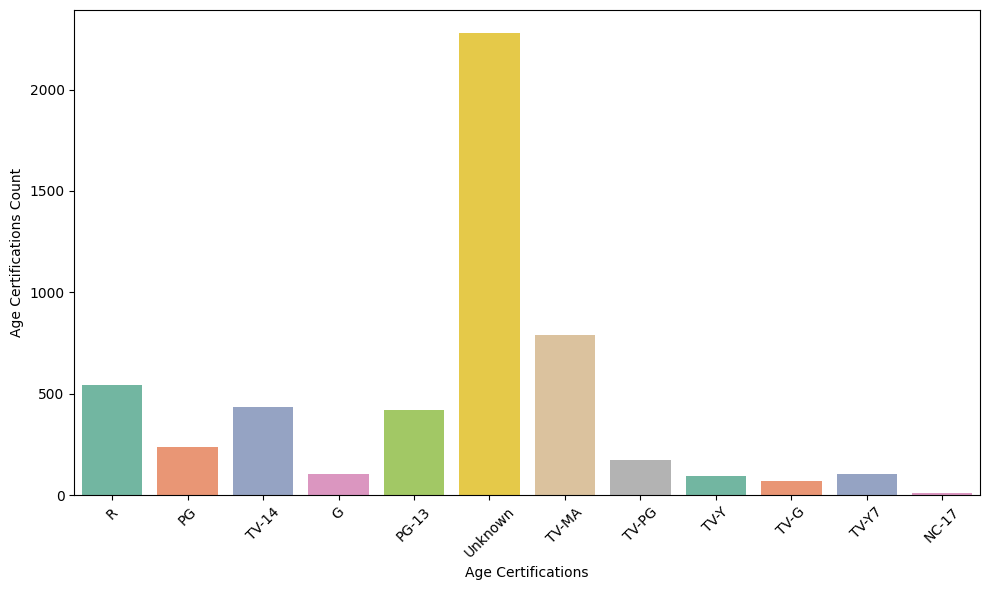

In [39]:

plt.figure(figsize=(10, 6))
sns.countplot(data, x='age_certification', palette='Set2')
plt.xlabel('Age Certifications')
plt.ylabel('Age Certifications Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()


The visualization reveals that "Unknown" is the most common age certification compared to others. This indicates that there is a significant number of films and shows that either haven't been assigned or haven't acquired age certifications. Following "Unknown," TV-MA stands as the second-highest age certification. Subsequently, PG-13 and TV-14 follow in terms of frequency.

This pattern suggests a notable presence of content without specified age certifications, emphasizing the importance of addressing and assigning appropriate certifications to maintain clarity and suitability for different audiences. Additionally, the prevalence of TV-MA, PG-13, and TV-14 certifications indicates a diversity in age-appropriate content within the dataset.

# **Exploring the correlation between release_year, imdb_score, and imdb_votes.**


<Axes: >

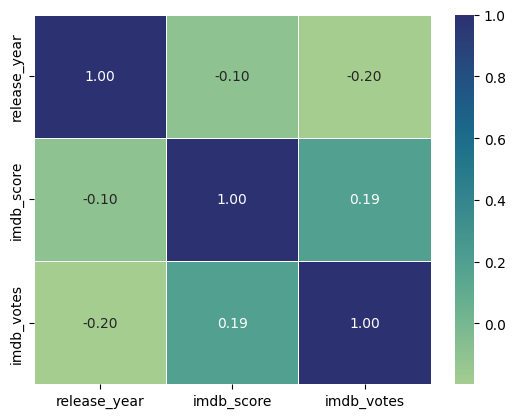

In [40]:
heatmap_data = data[['release_year', 'imdb_score', 'imdb_votes']].corr()
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='crest', cbar=True, linewidths=0.5)

From the visualization above, we can see that there's no significance correlation between release_year, imdb_score, and imdb_votes. Only imdb_score and imdb_votes who shows that there's a correlation, but it's a weak correlation.

# **Explore trends in the release of TV shows and movies.**


In [41]:
movie_shows = pd.DataFrame(data.groupby(['type', 'release_year']).size()).reset_index()
movie = movie_shows[movie_shows['type'] == 'MOVIE']
show = movie_shows[movie_shows['type'] == 'SHOW']
movie.rename(columns={0 : 'count'}, inplace=True)
show.rename(columns={0 : 'count'}, inplace=True)

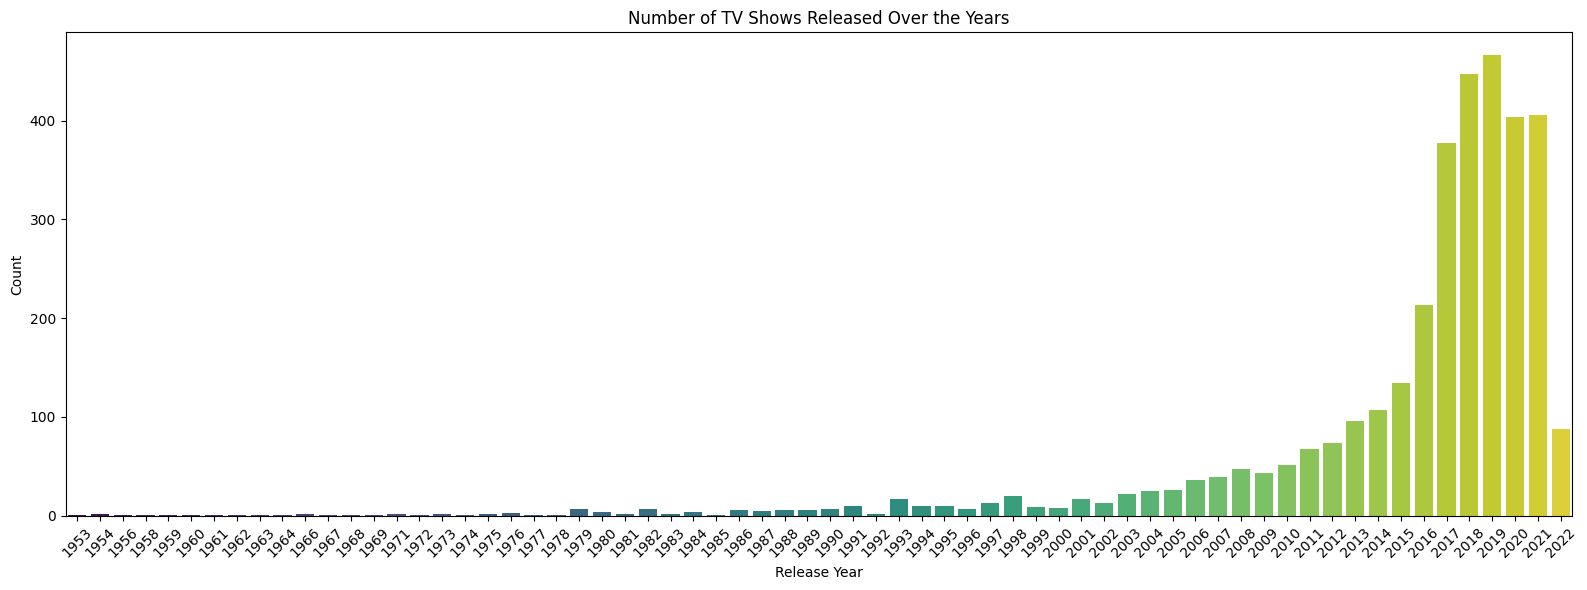

In [42]:
plt.figure(figsize=(16, 6))
sns.barplot(data=movie, x='release_year', y='count', palette='viridis')
plt.title('Number of TV Shows Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The presented visualization indicates a consistent upward trend in the number of movies released annually, spanning from the inception of the first-ever movie until 2022. Notably, from 2018 to 2021, the count of movie releases surpassed the 400 mark, reaching a peak in 2019. This suggests a continuous growth and expansion in the production and release of movies over the years, with a particularly notable surge during the mentioned period. But there's something peculiar in the year 2022, where there has been a notable decrease, with the number of film releases falling below 100. Maybe it's because this dataset doesn't cover the whole year.

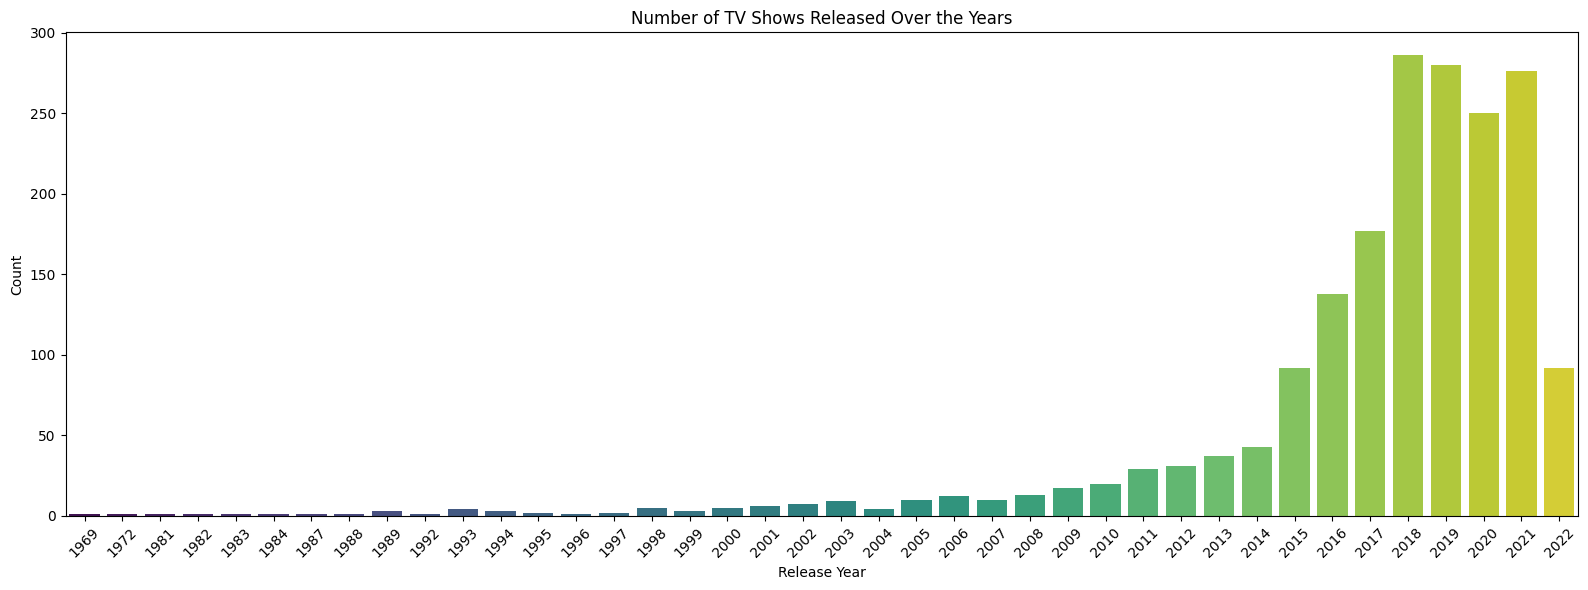

In [43]:
plt.figure(figsize=(16, 6))
sns.barplot(data=show, x='release_year', y='count', palette='viridis')
plt.title('Number of TV Shows Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TV shows, similar to movies, display a progression over the years, encompassing every year from the inception of the first TV show. The peak occurs in 2018, followed by notable peaks in 2019 and 2021. When comparing the visualizations of TV show release years and movie release years, a resemblance is apparent in the graphical representation of their respective developments until 2022, where at 2022 tv shows displays significant decrease in number, where it doesn't even touch the 100 marks.

Conclusion from both graphs:

In conclusion, the visualizations of movie and TV show release years reveal intriguing trends in the entertainment industry. Over the years, there has been a consistent growth in movie production, with a significant surge in the number of releases from 2018 to 2021. However, the abrupt decrease in movie releases in 2022 suggests a potential limitation in the dataset, indicating that it might not cover the entire year or that there was a notable dip in production during that period.

Similarly, TV shows have demonstrated a parallel development, showing a progression in the number of releases each year. The peaks in 2018, 2019, and 2021 underscore the industry's vitality during these periods. Yet, the unusual drop in the number of TV show releases in 2022, failing to reach even the 100 mark, raises questions and further emphasizes the need to consider dataset limitations or potential shifts in production trends.

In essence, both movie and TV show release year visualizations highlight the dynamic nature of the entertainment industry, with fluctuations and anomalies that warrant further investigation and context consideration.